Preliminary analysis from data made available by ANFAVEA on licensing, production, import and export of passenger vehicles in Brazil, from January 1957 to April 2020


<!-- TEASER_END -->

# Purpose 

The purpose of this article is to reveal some information that is hidden in the data provided by ANFAVEA - National Association of Automotive Vehicle Manufacturers in Brazil. Every month, ANFAVEA makes available an Excel spreadsheet with data on vehicle manufacturing and licensing in Brazil, since January 1957. We thus have a great historical base and, as you will see throughout this article, the manufacture and trade of vehicles from the Brazil is full of (predominantly) stumbles and (some) advances, making the role of the entrepreneur in the auto industry chain challenging, which is related not only with the vehicles themselves, but also the market for auto parts, electronics, plastics, rubber articles, among many others


# Introduction

The data are available in Microsoft Excel format (* .xlsx) through the link [ANFAVEA Statistics](http://anfavea.com.br/estatisticas). There are links to information on the production, marketing, import and export of passenger vehicles, light and heavy trucks, agricultural machinery and off-road vehicles.

The information is grouped into data specific to a given year and data covering a historical series. In this article, we will use the information in the spreadsheet made available through the link [Monthly series, starting in 1957, of vehicles per segment ...](http://www.anfavea.com.br/docs/SeriesTemporais_Autoveiculos.xlsm). In the next articles we will explore further the other information present in this interesting Anfavea page.

# Procedure

## Input Data inspection

After downloading the file and opening it in Microsoft Excel, we obtain the spreadsheet shown in the figure below:

![Spreadsheet ANFAVEA Hitorical Series](/images/Anfavea-Planilha-Serie-Historica.png)

The spreadsheet is made up of five groups of columns: "AUTOVEICULOS TOTAL", "AUTOMÓVEIS", "COMERCIAIS LEVES", "CAMINHÕES" and "ÔNIBUS". Each group in turn is composed of the following columns: "Licenciamento Total", "Licenciamento Nacionais", "Licenciamento Importados", "Produção" and "Exportação".

In this article we are only interested in the second group, referring to passenger vehicles. So, after this first inspection of the data, we have already determined the focus of the analysis and we will be able to move forward with the necessary coding to import the data and do some simplified studies.


## Requirements

Basically, we’ll use [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) and [numpy](https://numpy.org/) to load, manipulate and structure the data, and we will use the code library [matplotlib](https://matplotlib.org/), built into pandas, to plot the results of the analyzes.


In [1]:
import numpy as np
import pandas as pd

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## Preparation

As a preliminary step before importing the data, you need to define more convenient names for the data columns. Such names will be shorter and in English. As a personal preference, I don't usually mix languages in the codes I write. So, as coding languages are defined in English, my comments, classes, methods and variable names are also in that language. This is important because it facilitates understanding and collaboration with developers from other countries, when I need assistance when writing a code snippet.


In [2]:
# defines better column names for this dataset
dataset_group_names = ['grandtotal', 'automobile', 'light_commercial', 'truck', 'bus']
dataset_column_names = ['total', 'lic_national', 'lic_imported', 'production', 'exported']

column_names = ['date'] # this column will be de index

for group_name in dataset_group_names:
    for col_name in dataset_column_names:
        column_names.append("{}_{}".format(group_name, col_name))

print("Columns count: {}".format(len(column_names)))
print(column_names)

Columns count: 26
['date', 'grandtotal_total', 'grandtotal_lic_national', 'grandtotal_lic_imported', 'grandtotal_production', 'grandtotal_exported', 'automobile_total', 'automobile_lic_national', 'automobile_lic_imported', 'automobile_production', 'automobile_exported', 'light_commercial_total', 'light_commercial_lic_national', 'light_commercial_lic_imported', 'light_commercial_production', 'light_commercial_exported', 'truck_total', 'truck_lic_national', 'truck_lic_imported', 'truck_production', 'truck_exported', 'bus_total', 'bus_lic_national', 'bus_lic_imported', 'bus_production', 'bus_exported']


## Data Reading

We will use the pandas `read_excel` method to read the data directly from the Excel spreadsheet. Note that, in the same method call, we skip the first four lines (referring to the header of the spreadsheet), we use the simplified names for columns as we defined earlier, we define as the reading limit only the first 760 lines (until April 2020, which are the lines that contain data until the time this article is being written), we import only the columns between A and Z (if this is not done pandas imports an extra column) and finally we define as index the first column (the column with the dates).

As part of the initial inspection, we use the `info()` method for a first contact with the imported data.

In [3]:
# Loads the Anfavea historical dataset, from january/1957 to april/2020
vehicle_datafilename = 'data/SeriesTemporais_Autoveiculos.xlsm'
vehicle_df = pd.read_excel(vehicle_datafilename, skiprows=4, header=0, names=column_names, usecols='A:Z', nrows=760, index_col=0)

# Shows basic info
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 760 entries, 1957-01-01 to 2020-04-01
Data columns (total 25 columns):
grandtotal_total                 760 non-null int64
grandtotal_lic_national          760 non-null int64
grandtotal_lic_imported          760 non-null int64
grandtotal_production            760 non-null int64
grandtotal_exported              760 non-null int64
automobile_total                 760 non-null int64
automobile_lic_national          760 non-null int64
automobile_lic_imported          760 non-null int64
automobile_production            760 non-null int64
automobile_exported              760 non-null int64
light_commercial_total           760 non-null int64
light_commercial_lic_national    760 non-null int64
light_commercial_lic_imported    760 non-null int64
light_commercial_production      760 non-null int64
light_commercial_exported        760 non-null int64
truck_total                      760 non-null int64
truck_lic_national               760 non-nul

When observing the results of this first contact with the data, we note that they are "well behaved". That is, there is no invalid or missing data and the `pandas` automatic data type detection algorithm was able to correctly identify the` int64` types of each column, as well as the `DatetimeIndex` type of the index column. From this moment on, we will be able to carry out investigations on the data without any further action for data processing or validation.

## Focus on Automobiles

The first cut in the data that we will make will be in relation to obtaining data related to passenger vehicles, as described in the Purpose of this article. Here, the preparation that we performed previously with respect to column names will help us. We will filter the columns that start with `automobile`.

In [4]:
automobile_df = vehicle_df.loc[:, vehicle_df.columns.str.startswith('automobile')]
automobile_df.tail(12) 

,automobile_total,automobile_lic_national,automobile_lic_imported,automobile_production,automobile_exported
date,,,,,
2019-05-01,198776,183484,15292,230351,34983
2019-06-01,181297,167735,13562,190859,33127
2019-07-01,195854,181020,14834,221869,35773
2019-08-01,195917,180119,15798,222648,30228
2019-09-01,187818,173358,14460,203198,27424
2019-10-01,204532,189489,15043,239005,23813
2019-11-01,196770,182707,14063,186426,25140
2019-12-01,215190,196835,18355,141689,22603
2020-01-01,154581,141860,12721,162376,17445


The table above shows the last twelve values. Even without any graphical results, the effect of the new Covid-19 pandemic on the numbers of April/2020 is already clear. Often, when analyzing data in tabular form, it is important to "train the senses" and try to identify some patterns in the data (trends, falls, proportions, correlations, etc.). This helps to keep our perception sharp and shortens the time needed for analysis.

Another action that is necessary before we show the first result graphically is to consolidate the numbers in each year. For this, we will use the `resample` method, passing as the parameter `'A'` to consolidate the values on an annual basis. The consolidation function will be sum: `sum ()`.

We will plot these results on a stacked bar chart, showing the licenses for domestic and imported vehicles.

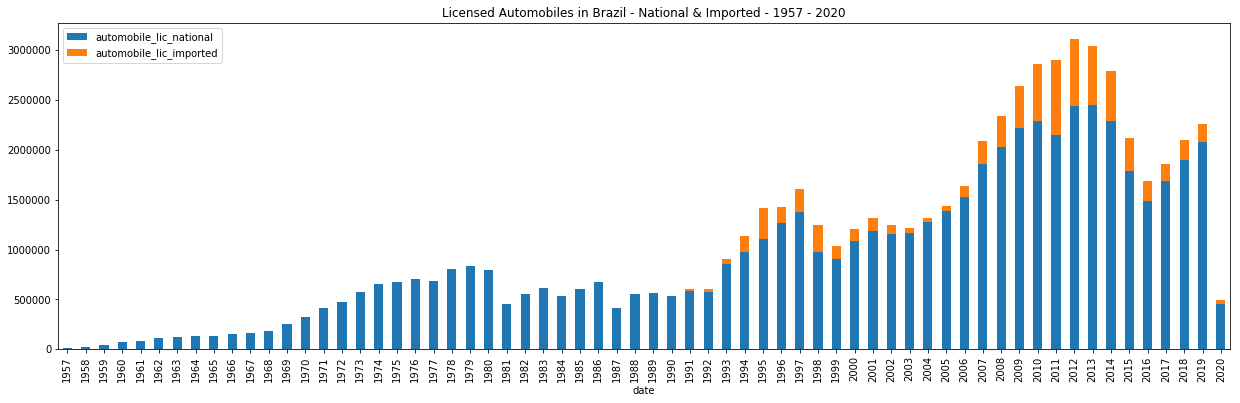

In [5]:
automobile_lic_yearly_df = automobile_df[['automobile_lic_national', 'automobile_lic_imported']].resample('A', kind='period').sum()

automobile_lic_yearly_df.plot(
    title='Licensed Automobiles in Brazil - National & Imported - 1957 - 2020',
    kind='bar',
    figsize=(21,6),
    stacked=True
)


As expected, the graph shows an increasing curve, compatible with the growth of the participation of the automobile industry in the Brazilian economy after the creation of the installation of the first car factory in Brazil by ROMI industries, in the interior of the state of São Paulo (Santa Bárbara d 'Oeste), where the Romi-Isetta vehicle was produced in 1956.

Since 1990, the Brazilian economy has opened up to importing vehicles. This opening had the positive aspect of forcing the national industry to improve the vehicles produced locally, but on the other hand it caused the closure of many small genuinely national manufacturers suffocated by the tax burden imposed by the government. To quote the manufacturer Gurgel, which asked for an agreement in 1993 to finally end its activities in 1996.

Continuing to try to put a historical perspective on the observation of this graph, it is worth mentioning that since 1998 there has been a major boost in the Brazilian auto industry, with the arrival of manufacturers such as Renault (1998), Mercedes (1999), among others, as well as the expansion of manufacturers that were already present in Brazil.

In the next section, we will prove that the decision of these automakers to expand business in Brazil from 1998 was justified.

## Commercialization Growth

In this section, we will analyze the percentage change year after year in the sale of vehicles, domestic and imported, since the market opened in 1990, but taking 1991 as a reference (first "full" year after this opening).

It is clear in the graph the strong growth in sales of imports until 1995, with an average rate of `110.11`. Certainly entrepreneurs who invested in imports during this period enjoyed good years of profits. Following that, there was a period of great fluctuation in annual sales, only experiencing a consistent improvement between 2005 and 2011. After that, the numbers were not good (except in 2018) until culminating in the trajectory in sales caused by Covid-19


Imported Licensed: 1991-1995 = 110.11


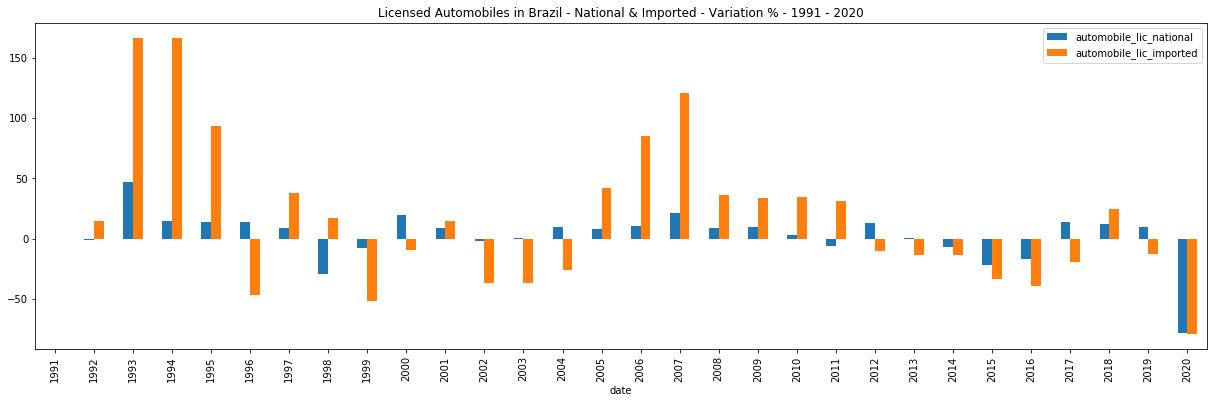

In [6]:
automobile_lic_yearly_variation_since_1991_df = automobile_lic_yearly_df.loc['1991-01-01':,['automobile_lic_national', 'automobile_lic_imported']].pct_change() * 100

automobile_lic_yearly_variation_since_1991_df.plot(
    title='Licensed Automobiles in Brazil - National & Imported - Variation % - 1991 - 2020',
    kind='bar',
    figsize=(21,6)
)

print("Imported Licensed: 1991-1995 = %.2f" % automobile_lic_yearly_variation_since_1991_df.loc['1991-01-01':'1995-12-31', 'automobile_lic_imported'].mean())


The impact of the new automakers that have been installed in the country since 1998 can be identified in the chart below. Although in 1999 we observed a retraction of `-7.51%`, sales have been quite strong since 2000 (except for a small drop in 2002), resulting in an average of `+ 7.6%` and whose best year was in 2007 with a growth of `+ 21.3%` in national vehicle sales. That year, Brazil consolidated itself as the sixth largest automobile industry in the world.

In [7]:
automobile_lic_yearly_variation_since_1991_df.loc['1999-01-01':'2010-12-31', 'automobile_lic_national'].describe()

count    12.000000
mean      7.601852
std       8.329894
min      -7.516355
25%       2.274339
50%       9.002218
75%       9.979868
max      21.336157
Name: automobile_lic_national, dtype: float64

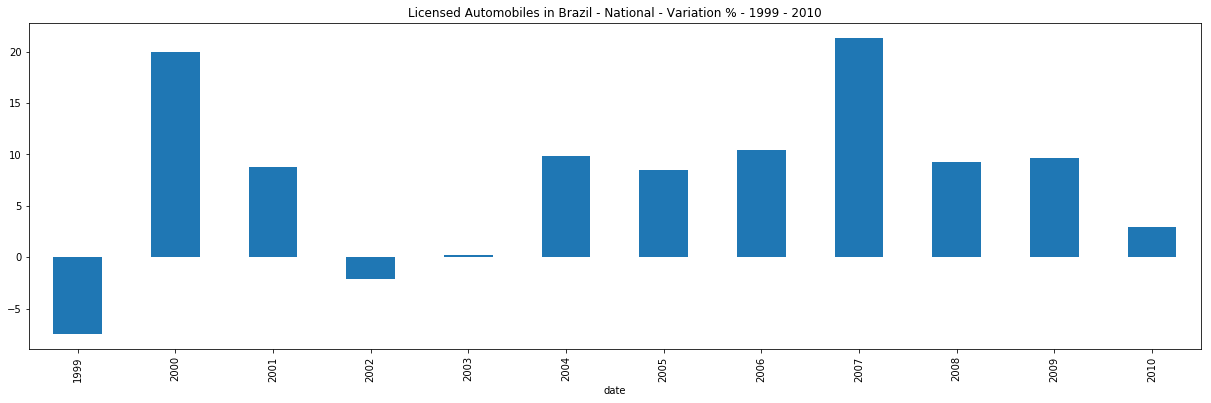

In [8]:
automobile_lic_yearly_variation_since_1991_df.loc[
        '1999-01-01':'2010-12-31', 
        'automobile_lic_national'].plot(
    title='Licensed Automobiles in Brazil - National - Variation % - 1999 - 2010',
    kind='bar',
    figsize=(21,6)
)

# Conclusion & Next Steps

This first analysis of the commercialization data for passenger vehicles in Brazil revealed some interesting figures. It's a business of ups and downs, requiring a lot of management on the part of the entrepreneurs. Apart from the discussion about the (very likely) exorbitant profit margin that is incorporated in vehicle prices and the constant bumps that the Brazilian economy has gone through in the past decades, it still seems to me that the automotive industry is very promising, since the consumer Brazilians have a very passionate profile when purchasing vehicles and also considering the poor public transport infrastructure in most cities.

However, the advent of Covid-19 may change the outlook for the national auto industry. If, on the one hand, the devaluation of the exchange rate may favor production for the export of vehicles, on the other hand, the retraction of the economy may demand a longer time to return to double-digit growth figures, as presented in the first decade of this century, due mainly due to the delay in the recovery of lost jobs and the economic power of the population, since jobs that arise after the pandemic will probably have lower wages than before. Another negative aspect of the business will be what is being called the "new normal": changing consumer habits, which possibly will use more shared vehicles, teleworking and online shopping, thus requiring less transport.

In the next articles I will continue to investigate the numbers of commercial vehicles sold in Brazil, focusing on performance by quarter and trying to identify whether or not there is seasonality. Until then!